In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [25]:
# Generate artificial dataset
X, y = make_moons(n_samples=20000, noise=0.4, random_state=42)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


Epoch [100/1000], Loss: 0.3160
Epoch [200/1000], Loss: 0.3142
Epoch [300/1000], Loss: 0.3139
Epoch [400/1000], Loss: 0.3138
Epoch [500/1000], Loss: 0.3137
Epoch [600/1000], Loss: 0.3137
Epoch [700/1000], Loss: 0.3136
Epoch [800/1000], Loss: 0.3136
Epoch [900/1000], Loss: 0.3136
Epoch [1000/1000], Loss: 0.3135


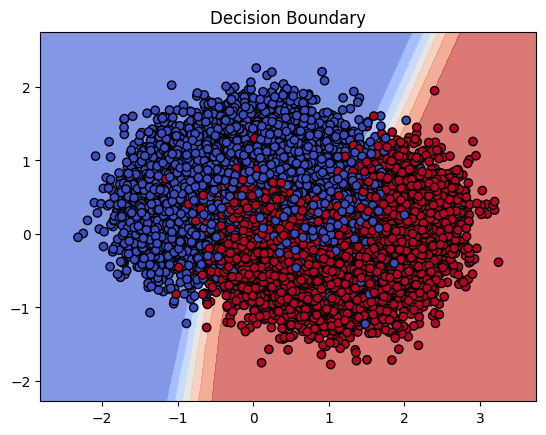

In [26]:
# Define the classifier model
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.layer1 = nn.Linear(2, 16)
        self.layer2 = nn.Linear(16, 16)
        self.layer3 = nn.Linear(16, 1)
    
    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x

# Initialize model, loss function, and optimizer
model = SimpleClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the classifier
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X).squeeze()
    loss = criterion(outputs, y)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Plot the decision boundary
with torch.no_grad():
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.01), torch.arange(y_min, y_max, 0.01))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    pred = model(grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, pred, cmap="coolwarm", alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()


In [4]:
# Calibration of the classifier

In [7]:
p = model(X)

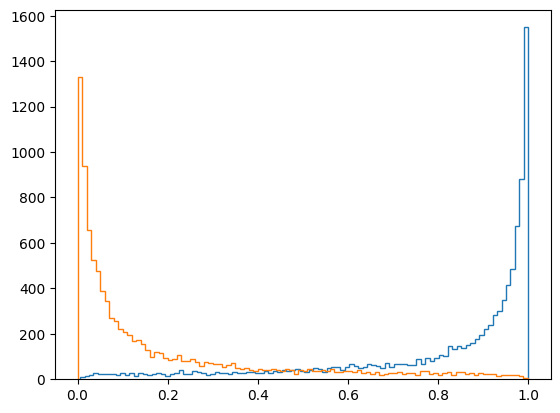

In [14]:
plt.hist(p[y==1].flatten().detach().numpy(), bins=100, histtype="step");
plt.hist(p[y==0].flatten().detach().numpy(), bins=100, histtype="step");

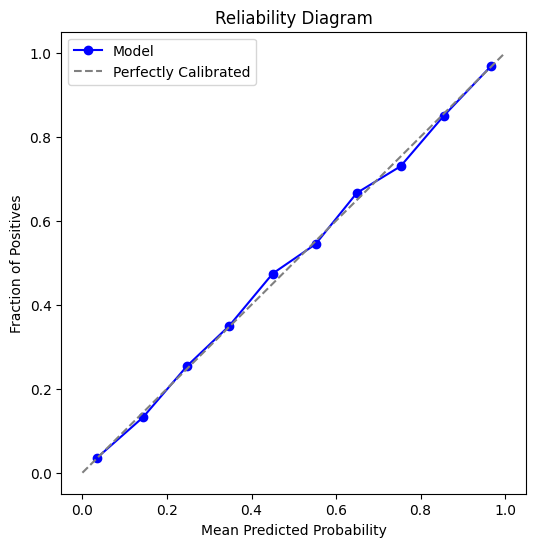

In [20]:
prob_true, prob_pred = calibration_curve(y, p.detach().numpy(), n_bins=10, strategy='uniform')

# Plot reliability diagram
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram")
plt.legend()
plt.show()


# More complicate dataset

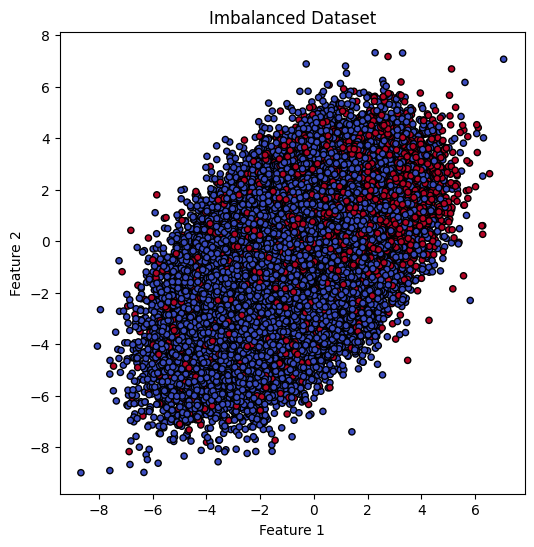

In [210]:
### from sklearn.datasets import make_classification
# Generate an imbalanced dataset
X, y = make_classification(
    n_samples=100000,         # Total number of samples
    n_features=10,           # Number of features
    n_informative=10,        # Number of informative features
    n_redundant=0,          # Number of redundant features
    n_clusters_per_class=1, # Number of clusters per class
    weights=[0.9, 0.1],     # Class imbalance (90% of class 0, 10% of class 1)
    flip_y=0.2,               # Fraction of samples whose class is assigned randomly
    random_state=42
)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Visualize the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k", s=20)
plt.title("Imbalanced Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [215]:
import sklearn
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X, y, stratify=y)

In [216]:
# Define the classifier model
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.layer1 = nn.Linear(10, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer5 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.dropout(torch.relu(self.layer1(x)))
        x = self.dropout(torch.relu(self.layer2(x)))
        #x = torch.relu(self.layer3(x))
        #x = torch.relu(self.layer4(x))
        x = torch.sigmoid(self.layer5(x))
        return x

# Initialize model, loss function, and optimizer
model = SimpleClassifier()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the classifier
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

        with torch.no_grad():
            outputs = model(X_val).squeeze()
            loss = criterion(outputs, y_val)
            print(f'Epoch [{epoch+1}/{num_epochs}], Validation Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.3334
Epoch [100/1000], Validation Loss: 0.3360
Epoch [200/1000], Loss: 0.3285
Epoch [200/1000], Validation Loss: 0.3322
Epoch [300/1000], Loss: 0.3252
Epoch [300/1000], Validation Loss: 0.3304
Epoch [400/1000], Loss: 0.3227
Epoch [400/1000], Validation Loss: 0.3283
Epoch [500/1000], Loss: 0.3216
Epoch [500/1000], Validation Loss: 0.3283
Epoch [600/1000], Loss: 0.3205
Epoch [600/1000], Validation Loss: 0.3286
Epoch [700/1000], Loss: 0.3196
Epoch [700/1000], Validation Loss: 0.3295
Epoch [800/1000], Loss: 0.3188
Epoch [800/1000], Validation Loss: 0.3302
Epoch [900/1000], Loss: 0.3178
Epoch [900/1000], Validation Loss: 0.3312
Epoch [1000/1000], Loss: 0.3166
Epoch [1000/1000], Validation Loss: 0.3333


In [217]:
with torch.no_grad():
    p = model(X_val).detach().numpy()

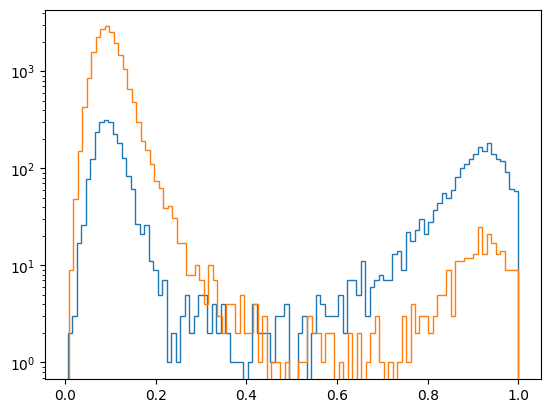

In [219]:
plt.hist(p[y_val==1].flatten(), bins=100, histtype="step");
plt.hist(p[y_val==0].flatten(), bins=100, histtype="step");
plt.yscale("log")

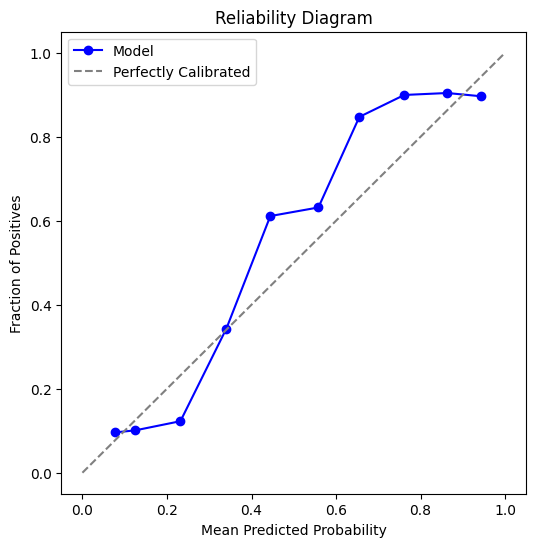

In [220]:
prob_true, prob_pred = calibration_curve(y_val, p, n_bins=10, strategy='uniform')

# Plot reliability diagram
plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Model', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram")
plt.legend()
plt.show()


## Histogram binning

Brier Score after Histogram Binning: 0.0896


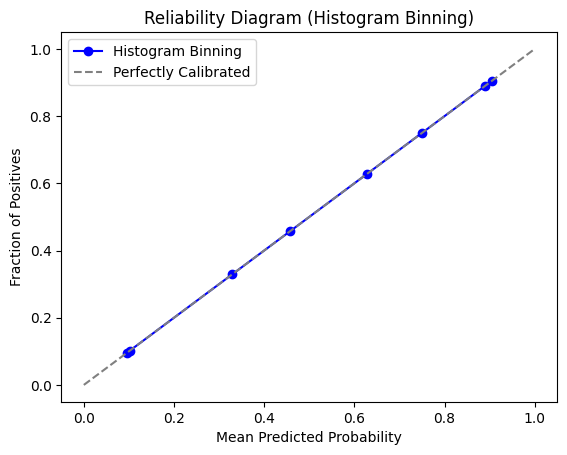

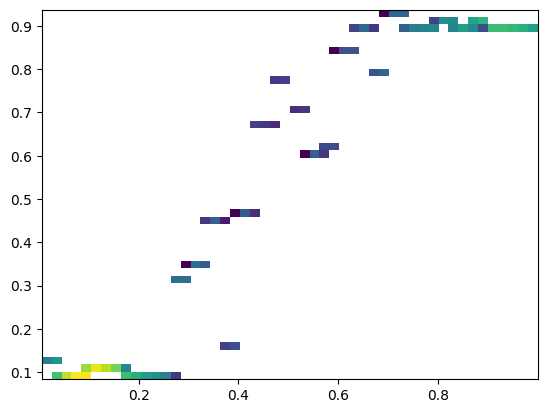

In [260]:
import numpy as np
from sklearn.metrics import brier_score_loss
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

def histogram_binning(y_true, y_prob, n_bins=10):
    # Binning the predicted probabilities
    bins =  np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(y_prob, bins, right=True) - 1  # Bin indices for each probability
    bin_indices = np.clip(bin_indices, 0, n_bins - 1)  # Ensure no index out of range

    # Calculate the calibrated probability for each bin
    bin_accuracies = np.zeros(n_bins)
    for i in range(n_bins):
        bin_mask = (bin_indices == i).squeeze()
        if np.sum(bin_mask) > 0:
            bin_accuracies[i] = np.mean(y_true[bin_mask])
        else:
            bin_accuracies[i] = bins[i]  # Set default if no samples in bin

    # Map each probability to its calibrated value
    y_prob_calibrated = bin_accuracies[bin_indices]
    return y_prob_calibrated


# Apply histogram binning for calibration
y_val_prob_histogram_calibrated = histogram_binning(y_val.numpy(), p, n_bins=30)

# Check calibration with Brier score
brier_score = brier_score_loss(y_val, y_val_prob_histogram_calibrated)
print(f"Brier Score after Histogram Binning: {brier_score:.4f}")

# Plot reliability diagram
prob_true, prob_pred = calibration_curve(y_val.numpy(), y_val_prob_histogram_calibrated, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Histogram Binning', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram (Histogram Binning)")
plt.legend()
plt.show()


plt.hist2d(p.flatten(), y_val_prob_histogram_calibrated.flatten(), bins=(50,50), norm=LogNorm());
#plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
#plt.xlabel("Mean Predicted Probability")
#plt.ylabel("Fraction of Positives")
#plt.title("Reliability Diagram (Histogram Binning)")
#plt.legend()
#plt.show()

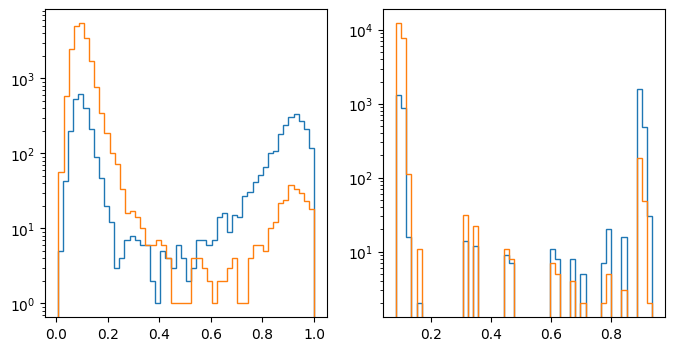

In [261]:
f, (ax, ay) = plt.subplots(1, 2, figsize=(8, 4))
ax.hist(p[y_val==1].flatten(), bins=50, histtype="step");
ax.hist(p[y_val==0].flatten(), bins=50, histtype="step");
ay.hist(y_val_prob_histogram_calibrated[y_val==1].flatten(), bins=50, histtype="step",);
ay.hist(y_val_prob_histogram_calibrated[y_val==0].flatten(), bins=50, histtype="step");
ax.set_yscale("log")
ay.set_yscale("log")

In [184]:
y_val_prob_histogram_calibrated.flatten()

array([0.01371037, 0.01371037, 0.01371037, ..., 0.24870466, 0.98151952,
       0.01371037])

## Platt scaling

In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss
import numpy as np

# Train the classifier
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


# Get raw model outputs on the validation set
with torch.no_grad():
    y_val_prob_raw = model(X_val).squeeze().numpy()

# Apply Platt scaling (logistic regression on validation set)
platt_scaler = LogisticRegression()
platt_scaler.fit(y_val_prob_raw.reshape(-1, 1), y_val.numpy())
y_val_prob_platt = platt_scaler.predict_proba(y_val_prob_raw.reshape(-1, 1))[:, 1]

# Check calibration with Brier score
brier_score = brier_score_loss(y_val.numpy(), y_val_prob_platt)
print(f"Brier Score after Platt Scaling: {brier_score:.4f}")


Brier Score after Platt Scaling: 0.0901


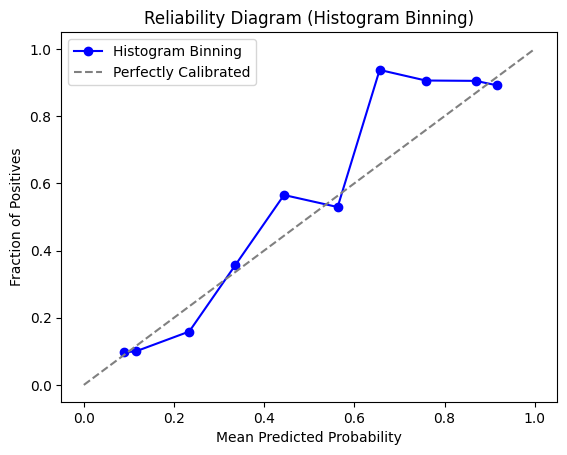

In [235]:
# Plot reliability diagram
prob_true, prob_pred = calibration_curve(y_val.numpy(), y_val_prob_platt, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Histogram Binning', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram (Histogram Binning)")
plt.legend()
plt.show()

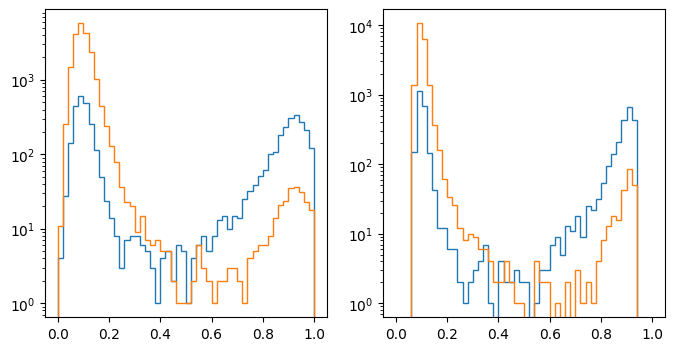

In [259]:
f, (ax, ay) = plt.subplots(1, 2, figsize=(8, 4))
ax.hist(p[y_val==1].flatten(), bins=50, histtype="step",range=(0,1));
ax.hist(p[y_val==0].flatten(), bins=50, histtype="step",range=(0,1));
ay.hist(y_val_prob_platt[y_val==1].flatten(), bins=50, histtype="step", range=(0,1));
ay.hist(y_val_prob_platt[y_val==0].flatten(), bins=50, histtype="step",range=(0,1));
ax.set_yscale("log")
ay.set_yscale("log")

## Temperature scaling

In [246]:
class TemperatureScaling(nn.Module):
    def __init__(self):
        super(TemperatureScaling, self).__init__()
        self.temperature = nn.Parameter(torch.ones(1) * 1.5)  # Initial temperature

    def forward(self, logits):
        return logits / self.temperature

# Get logits from the model on the validation set
with torch.no_grad():
    y_val_logits = torch.log(model(X_val)).squeeze()

# Initialize and optimize temperature scaling
temp_scaler = TemperatureScaling()
optimizer = optim.LBFGS([temp_scaler.temperature], lr=0.001, max_iter=10)

def temp_loss():
    loss = criterion(torch.sigmoid(temp_scaler(y_val_logits)), y_val)
    loss.backward()
    return loss

optimizer.step(temp_loss)

# Apply temperature scaling
with torch.no_grad():
    y_val_prob_temp_scaled = torch.sigmoid(temp_scaler(y_val_logits)).numpy()

# Check calibration with Brier score
brier_score = brier_score_loss(y_val.numpy(), y_val_prob_temp_scaled)
print(f"Brier Score after Temperature Scaling: {brier_score:.4f}")


Brier Score after Temperature Scaling: 0.1122


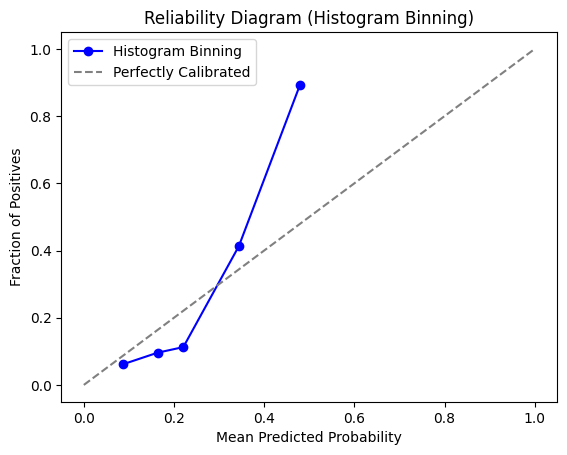

In [247]:
# Plot reliability diagram
prob_true, prob_pred = calibration_curve(y_val.numpy(), y_val_prob_temp_scaled, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Histogram Binning', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram (Histogram Binning)")
plt.legend()
plt.show()



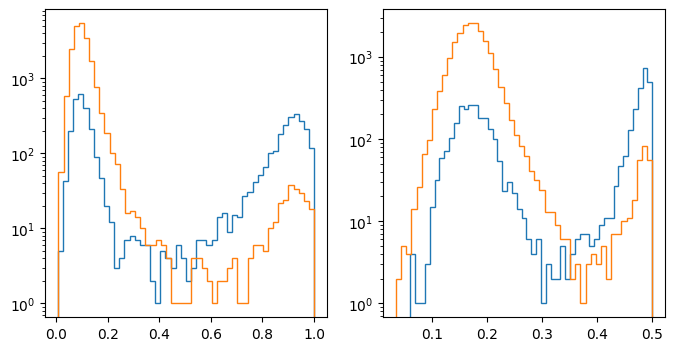

In [248]:
f, (ax, ay) = plt.subplots(1, 2, figsize=(8, 4))
ax.hist(p[y_val==1].flatten(), bins=50, histtype="step");
ax.hist(p[y_val==0].flatten(), bins=50, histtype="step");
ay.hist(y_val_prob_temp_scaled[y_val==1].flatten(), bins=50, histtype="step",);
ay.hist(y_val_prob_temp_scaled[y_val==0].flatten(), bins=50, histtype="step");
ax.set_yscale("log")
ay.set_yscale("log")

## Isotonic regression

In [256]:
from sklearn.isotonic import IsotonicRegression

# Apply Isotonic Regression on the raw outputs
isotonic_regressor = IsotonicRegression(out_of_bounds='clip', increasing=True)
y_val_prob_isotonic = isotonic_regressor.fit_transform(p, y_val.numpy())

# Check calibration with Brier score
brier_score = brier_score_loss(y_val.numpy(), y_val_prob_isotonic)
print(f"Brier Score after Isotonic Regression: {brier_score:.4f}")

Brier Score after Isotonic Regression: 0.0896


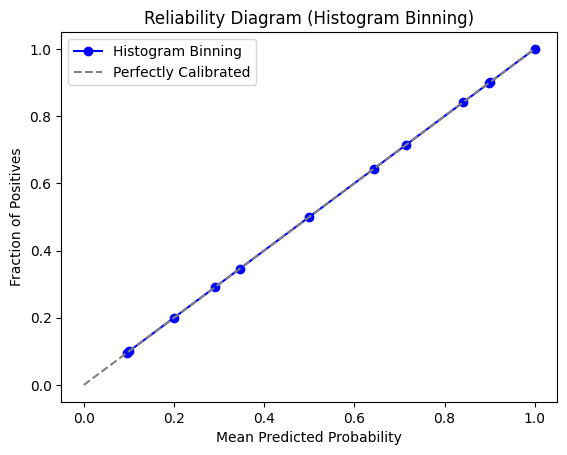

In [257]:
# Plot reliability diagram
prob_true, prob_pred = calibration_curve(y_val.numpy(), y_val_prob_isotonic, n_bins=20)
plt.plot(prob_pred, prob_true, marker='o', label='Histogram Binning', color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated", color="gray")
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Reliability Diagram (Histogram Binning)")
plt.legend()
plt.show()



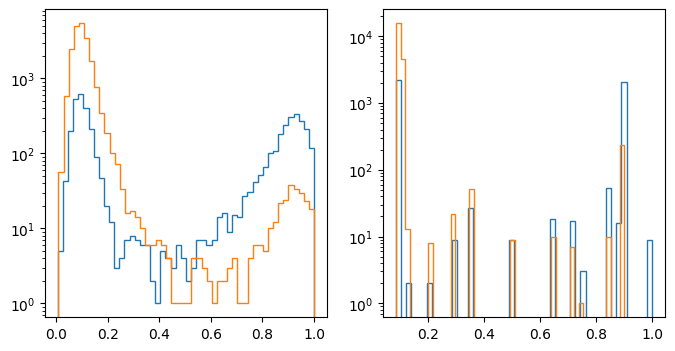

In [258]:
f, (ax, ay) = plt.subplots(1, 2, figsize=(8, 4))
ax.hist(p[y_val==1].flatten(), bins=50, histtype="step");
ax.hist(p[y_val==0].flatten(), bins=50, histtype="step");
ay.hist(y_val_prob_isotonic[y_val==1].flatten(), bins=50, histtype="step",);
ay.hist(y_val_prob_isotonic[y_val==0].flatten(), bins=50, histtype="step");
ax.set_yscale("log")
ay.set_yscale("log")